<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(1_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_1.2_n250.csv',
 'data_add_delta_1.2_n120.csv',
 'data_add_delta_1.2_n60.csv',
 'data_add_delta_1.2_n30.csv',
 'data_add_delta_1.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,98.094395,68.645875,-12.455374,164.284896,175.758339,-11.473443
1,0.0,1.0,24.249997,36.772462,-1.744100,69.278359,74.771044,-5.492685
2,0.0,2.0,75.201988,88.809998,-12.373578,161.638408,176.626884,-14.988476
3,0.0,3.0,49.084191,66.402556,-9.687949,115.798798,128.985302,-13.186505
4,0.0,4.0,23.950107,26.885002,2.704657,63.539766,63.911021,-0.371255
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,33.986853,53.289597,14.704983,111.981432,99.754260,12.227172
119996,999.0,116.0,38.776256,46.871344,-0.136603,95.510997,98.029249,-2.518253
119997,999.0,117.0,32.177663,47.774871,10.923357,100.875890,92.814289,8.061601
119998,999.0,118.0,34.738463,50.335285,-0.817258,94.256491,97.621722,-3.365231


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,98.094395,68.645875,-12.455374,164.284896,175.758339,-11.473443
1,0.0,1.0,24.249997,36.772462,-1.744100,69.278359,74.771044,-5.492685
2,0.0,2.0,75.201988,88.809998,-12.373578,161.638408,176.626884,-14.988476
3,0.0,3.0,49.084191,66.402556,-9.687949,115.798798,128.985302,-13.186505
4,0.0,4.0,23.950107,26.885002,2.704657,63.539766,63.911021,-0.371255
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,33.986853,53.289597,14.704983,111.981432,99.754260,12.227172
119996,999.0,116.0,38.776256,46.871344,-0.136603,95.510997,98.029249,-2.518253
119997,999.0,117.0,32.177663,47.774871,10.923357,100.875890,92.814289,8.061601
119998,999.0,118.0,34.738463,50.335285,-0.817258,94.256491,97.621722,-3.365231


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    98.094395  68.645875 -12.455374  164.284896  175.758339   
      1.0    24.249997  36.772462  -1.744100   69.278359   74.771044   
      2.0    75.201988  88.809998 -12.373578  161.638408  176.626884   
      3.0    49.084191  66.402556  -9.687949  115.798798  128.985302   
      4.0    23.950107  26.885002   2.704657   63.539766   63.911021   
...                ...        ...        ...         ...         ...   
999.0 115.0  33.986853  53.289597  14.704983  111.981432   99.754260   
      116.0  38.776256  46.871344  -0.136603   95.510997   98.029249   
      117.0  32.177663  47.774871  10.923357  100.875890   92.814289   
      118.0  34.738463  50.335285  -0.817258   94.256491   97.621722   
      119.0  97.806149  48.418772   6.507453  162.732374  153.889967   

                 e_hat  
rep   index             
0.0   0.0   -11.473443  
      1.0    -5.492685  
      2.0   -14.988476  
      3.0   -13.186505  
      4.0    -0.371255  
...                ...  
999.0 115.0  12.227172  
      116.0  -2.518253  
      117.0   8.061601  
      118.0  -3.365231  
      119.0   8.842407  

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    98.094395  68.645875 -12.455374  164.284896  175.758339   
      1.0    24.249997  36.772462  -1.744100   69.278359   74.771044   
      2.0    75.201988  88.809998 -12.373578  161.638408  176.626884   
      3.0    49.084191  66.402556  -9.687949  115.798798  128.985302   
      4.0    23.950107  26.885002   2.704657   63.539766   63.911021   
...                ...        ...        ...         ...         ...   
999.0 115.0  33.986853  53.289597  14.704983  111.981432   99.754260   
      116.0  38.776256  46.871344  -0.136603   95.510997   98.029249   
      117.0  32.177663  47.774871  10.923357  100.875890   92.814289   
      118.0  34.738463  50.335285  -0.817258   94.256491   97.621722   
      119.0  97.806149  48.418772   6.507453  162.732374  153.889967   

                 e_hat  
rep   index             
0.0   0.0   -11.473443  
      1.0    -5.492685  
      2.0   -14.988476  
      3.0   -13.186505  
      4.0    -0.371255  
...                ...  
999.0 115.0  12.227172  
      116.0  -2.518253  
      117.0   8.061601  
      118.0  -3.365231  
      119.0   8.842407  

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,98.094395,68.645875,-12.455374,164.284896,175.758339,-11.473443
1,0.0,1.0,24.249997,36.772462,-1.744100,69.278359,74.771044,-5.492685
2,0.0,2.0,75.201988,88.809998,-12.373578,161.638408,176.626884,-14.988476
3,0.0,3.0,49.084191,66.402556,-9.687949,115.798798,128.985302,-13.186505
4,0.0,4.0,23.950107,26.885002,2.704657,63.539766,63.911021,-0.371255
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,33.986853,53.289597,14.704983,111.981432,99.754260,12.227172
119996,999.0,116.0,38.776256,46.871344,-0.136603,95.510997,98.029249,-2.518253
119997,999.0,117.0,32.177663,47.774871,10.923357,100.875890,92.814289,8.061601
119998,999.0,118.0,34.738463,50.335285,-0.817258,94.256491,97.621722,-3.365231


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    98.094395  68.645875 -12.455374  164.284896  175.758339   
      1.0    24.249997  36.772462  -1.744100   69.278359   74.771044   
      2.0    75.201988  88.809998 -12.373578  161.638408  176.626884   
      3.0    49.084191  66.402556  -9.687949  115.798798  128.985302   
      4.0    23.950107  26.885002   2.704657   63.539766   63.911021   
...                ...        ...        ...         ...         ...   
999.0 115.0  33.986853  53.289597  14.704983  111.981432   99.754260   
      116.0  38.776256  46.871344  -0.136603   95.510997   98.029249   
      117.0  32.177663  47.774871  10.923357  100.875890   92.814289   
      118.0  34.738463  50.335285  -0.817258   94.256491   97.621722   
      119.0  97.806149  48.418772   6.507453  162.732374  153.889967   

                 e_hat  
rep   index             
0.0   0.0   -11.473443  
      1.0    -5.492685  
      2.0   -14.988476  
      3.0   -13.186505  
      4.0    -0.371255  
...                ...  
999.0 115.0  12.227172  
      116.0  -2.518253  
      117.0   8.061601  
      118.0  -3.365231  
      119.0   8.842407  

[120000 rows x 6 columns]

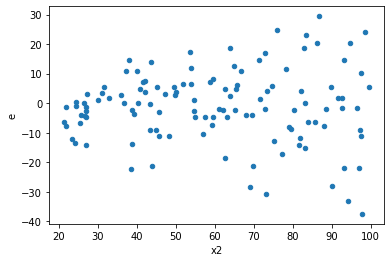

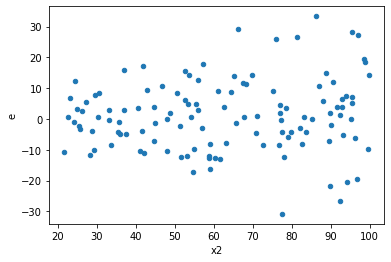

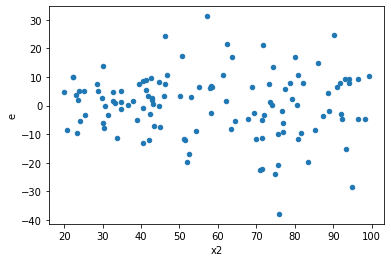

In [17]:
tablenew0 = table.loc[2.0]
tablenew1 = table.loc[6.0]
tablenew2 = table.loc[8.0]
tablenew3 = table.loc[3.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,46.0,46.0,3848.66497000808,7737.040450620741,83.66662978278436,168.1965315352335,2.010317996217919,0.01969913078006469,0.9901504346099677,0.009849565390032344,Reject001=1 : Homoscedasticity
2.0,46.0,46.0,4167.937080518764,9580.476248157102,90.60732783736442,208.27122278602394,2.2986134538683256,0.005633271889342151,0.9971833640553289,0.0028166359446710754,Reject001=0 : Heteroscedasticity
3.0,46.0,46.0,4750.692847788524,7960.221928237373,103.27593147366356,173.04830278776896,1.675591789088807,0.08337149315920667,0.9583142534203967,0.04168574657960333,Reject001=1 : Homoscedasticity
4.0,46.0,46.0,6746.810214167097,7723.031023936941,146.6697872645021,167.89197878123784,1.1446936817223574,0.6486660078816979,0.675666996059151,0.32433300394084896,Reject001=1 : Homoscedasticity
5.0,46.0,46.0,5243.788418253298,7828.821525469984,113.99540039681082,170.19177229282576,1.4929705207438098,0.1779010087477193,0.9110494956261403,0.08895050437385965,Reject001=1 : Homoscedasticity
6.0,46.0,46.0,3821.918872868798,9070.525134836458,83.08519288845214,197.18532901818386,2.3732908616210278,0.0040825644302724395,0.9979587177848638,0.0020412822151362198,Reject001=0 : Heteroscedasticity
7.0,46.0,46.0,4760.193985509381,8573.827940044734,103.4824779458561,186.38756391401594,1.8011509543822217,0.048761871632672094,0.975619064183664,0.024380935816336047,Reject001=1 : Homoscedasticity
8.0,46.0,46.0,2795.3413237605646,6697.198651258802,60.768289646968796,145.59127502736527,2.3958428955820965,0.00370539399679104,0.9981473030016045,0.00185269699839552,Reject001=0 : Heteroscedasticity
9.0,46.0,46.0,3576.1023272272655,5348.414485094484,77.74135493972317,116.26988011074965,1.4955988379788288,0.17601733989097013,0.9119913300545149,0.08800866994548506,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,3848.66497000808,7737.040450620741,83.66662978278436,168.1965315352335,2.010317996217919,0.01969913078006469,Reject001=1 : Homoscedasticity
1.0,46.0,46.0,8130.809372464709,7284.954876246514,176.75672548836323,158.36858426622857,0.8959692132147739,0.7110804596201785,Reject001=1 : Homoscedasticity
2.0,46.0,46.0,4167.937080518764,9580.476248157102,90.60732783736442,208.27122278602394,2.2986134538683256,0.005633271889342151,Reject001=0 : Heteroscedasticity
3.0,46.0,46.0,4750.692847788524,7960.221928237373,103.27593147366356,173.04830278776896,1.675591789088807,0.08337149315920667,Reject001=1 : Homoscedasticity
4.0,46.0,46.0,6746.810214167097,7723.031023936941,146.6697872645021,167.89197878123784,1.1446936817223574,0.6486660078816979,Reject001=1 : Homoscedasticity
5.0,46.0,46.0,5243.788418253298,7828.821525469984,113.99540039681082,170.19177229282576,1.4929705207438098,0.1779010087477193,Reject001=1 : Homoscedasticity
6.0,46.0,46.0,3821.918872868798,9070.525134836458,83.08519288845214,197.18532901818386,2.3732908616210278,0.0040825644302724395,Reject001=0 : Heteroscedasticity
7.0,46.0,46.0,4760.193985509381,8573.827940044734,103.4824779458561,186.38756391401594,1.8011509543822217,0.048761871632672094,Reject001=1 : Homoscedasticity
8.0,46.0,46.0,2795.3413237605646,6697.198651258802,60.768289646968796,145.59127502736527,2.3958428955820965,0.00370539399679104,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      648
Reject001=0 : Heteroscedasticity    352
Name: Result_test, dtype: int64